# Baseball Case Study

In [1]:
from IPython.display import Image
Image(url= "https://cdn.vox-cdn.com/thumbor/vdJEAgAaTofwpuE_SvigzF-iZtQ=/213x0:846x422/1200x800/filters:focal(213x0:846x422)/cdn.vox-cdn.com/uploads/chorus_image/image/42565450/177160.0.0.jpg")

## Introduction

### Baseball is a bat-and-ball game played between two opposing teams, typically of nine players each, that take turns batting and fielding. The game proceeds when a player on the fielding team, called the pitcher, throws a ball which a player on the batting team tries to hit with a bat.

### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. 

### Features : Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors.

### Output: Number of predicted wins (W)

## Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocession, normalizing
from sklearn.preprocessing import StandardScaler
from scipy import stats

# for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocession, normalizing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# I have import important libraries for this project in one go so that it will save time.

## Dataset

In [23]:
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# Each of the columns contain data related to a specific team and year. Full form of columns names are

# W - Wins
# R - Runs scored
# AB - At bats
# H - Hits by batters
# 2B- Doubles
# 3B - Triples
# HR - Homeruns by batters
# BB - Walks by batters
# SO - Strikeouts by batters
# SB - Stolen bases
# RA - Opponents runs scored
# ER - Earned runs allowed
# ERA - Earned run average
# CG - Complete games
# SHO - Shutouts
# SV - Saves
# E - Errors

## Exploratory Data Analysis:

In [46]:
df.shape

(30, 17)

In [4]:
# There are 30 rows and 17 columns in the dataset.

In [48]:
pd.set_option('display.max_rows',None)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
# It is a mixed dataset as 16 columns are integers type and 1 columns are float type.
# There is no missing values in any columns as count is 30 for every columns.

In [49]:
# fetching describe command to understand the dataset

df.describe(include='all')

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
# Total number of counts in each columns is matching as there is no missing values.
# The difference betwwen the mean and 50% is not much.
# There are outlires in the dataset which i will remove it soon.

In [50]:
df.drop_duplicates(inplace = True)
df.shape

(30, 17)

In [7]:
# There are no duplicates in the dataset.

### Replacing all the zero values in CG column.

In [51]:
df['CG'] = df['CG'].replace(0,df['CG'].mean())

In [53]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [8]:
# There are few columns which are categorical in nature and few columns are continous in nature.

## Pair Plot

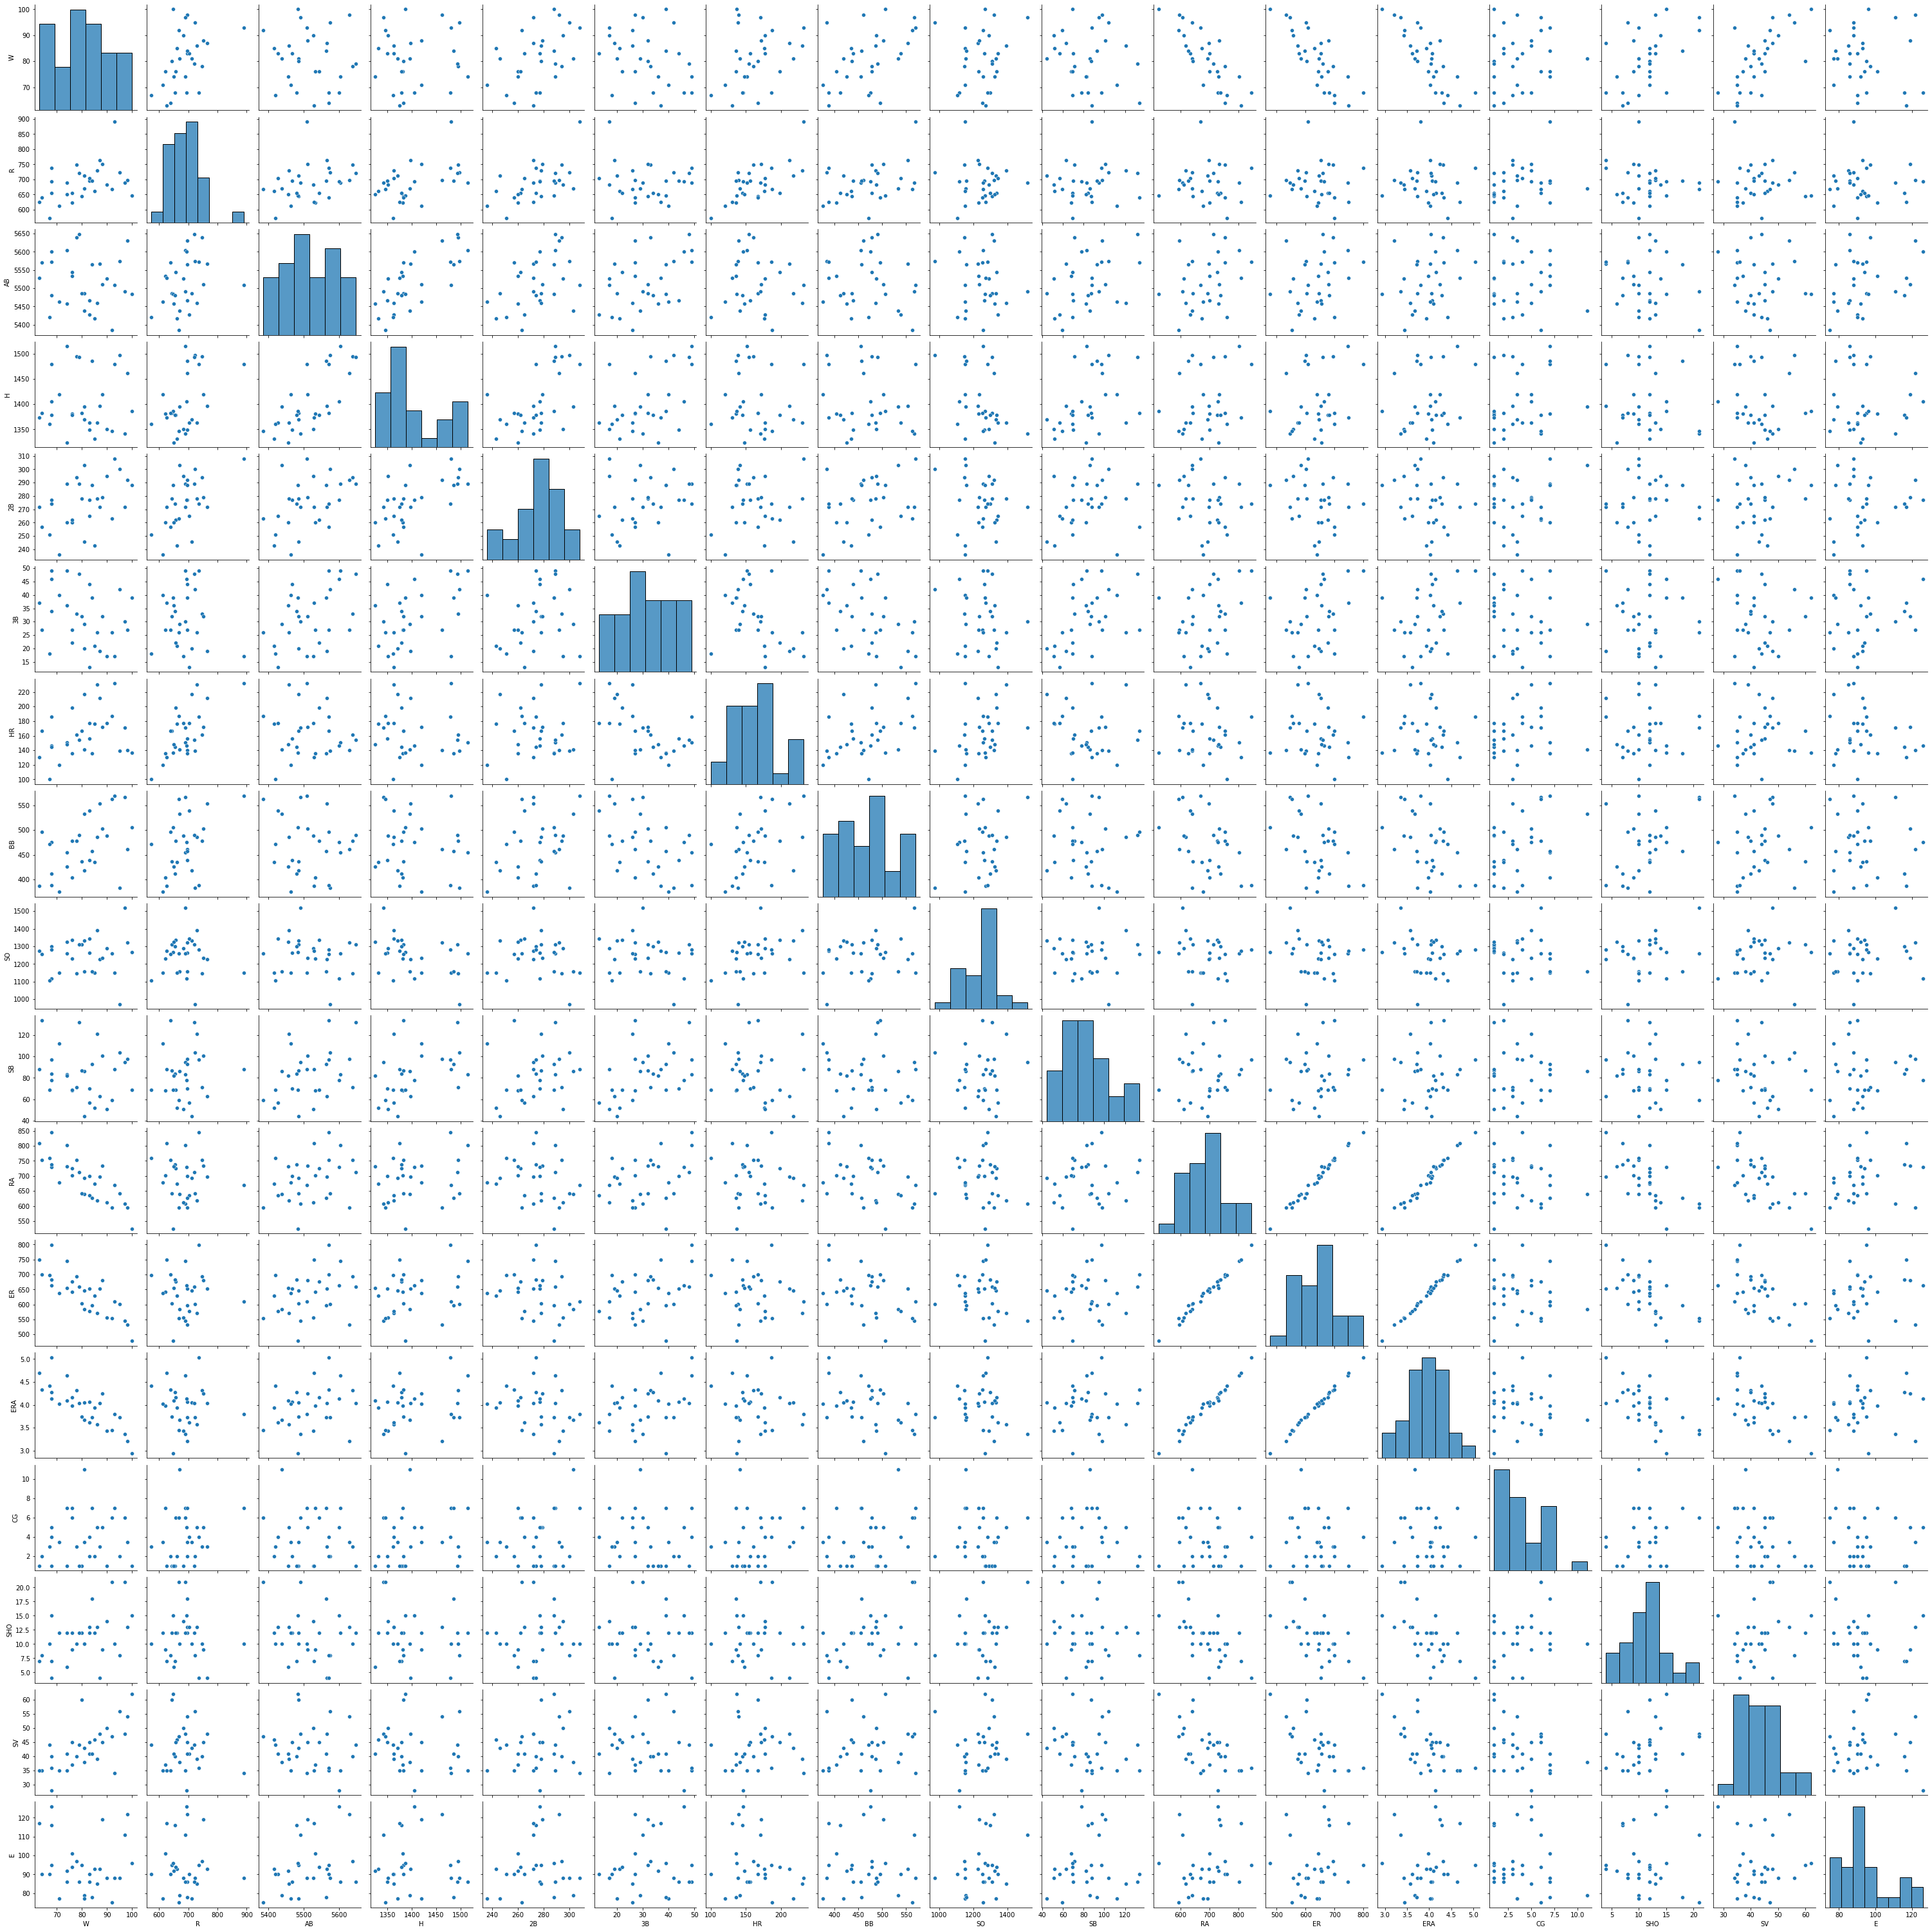

In [14]:
sns.pairplot(df)

In [9]:
# The above pair plot gives us the clear idea that target variable 'Win (W)' are positively corelated with few feature.
# Only few columns are negatively correlated.

## Count Plot

### W columns

In [10]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '63'),
  Text(1, 0, '64'),
  Text(2, 0, '67'),
  Text(3, 0, '68'),
  Text(4, 0, '71'),
  Text(5, 0, '74'),
  Text(6, 0, '76'),
  Text(7, 0, '78'),
  Text(8, 0, '79'),
  Text(9, 0, '80'),
  Text(10, 0, '81'),
  Text(11, 0, '83'),
  Text(12, 0, '84'),
  Text(13, 0, '85'),
  Text(14, 0, '86'),
  Text(15, 0, '87'),
  Text(16, 0, '88'),
  Text(17, 0, '90'),
  Text(18, 0, '92'),
  Text(19, 0, '93'),
  Text(20, 0, '95'),
  Text(21, 0, '97'),
  Text(22, 0, '98'),
  Text(23, 0, '100')])

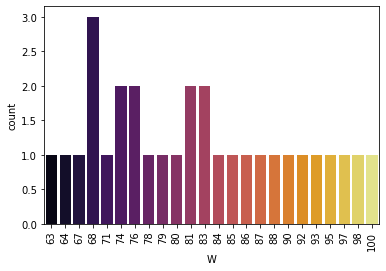

In [11]:
sns.countplot(df['W'],palette='inferno',data=df);
plt.xticks(rotation=90)

In [10]:
# 68 runs is the maximun times which leads to win the game.

## Box Plot

### CG 

<AxesSubplot:xlabel='CG', ylabel='W'>

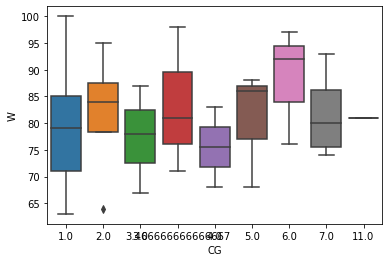

In [21]:
sns.boxplot(df['CG'],df['W'])

In [11]:
# One complete game can lead to win maximum time

### SHO

<AxesSubplot:xlabel='SHO', ylabel='W'>

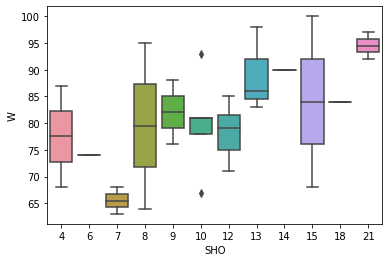

In [30]:
sns.boxplot(df['SHO'],df['W'])

In [12]:
# 15 times Shutouts is maximun to convert the game into win.

### E

<AxesSubplot:xlabel='E', ylabel='W'>

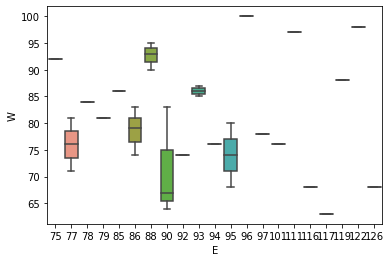

In [33]:
sns.boxplot(df['E'],df['W'])

In [13]:
# 88 times error is games leads to win.

### SV

<AxesSubplot:xlabel='SV', ylabel='W'>

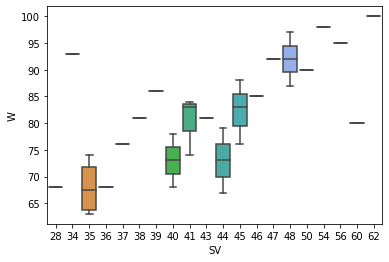

In [34]:
sns.boxplot(df['SV'],df['W'])

In [14]:
# 50 times saves are maximum time convert games into win.

### 2B

<AxesSubplot:xlabel='2B', ylabel='W'>

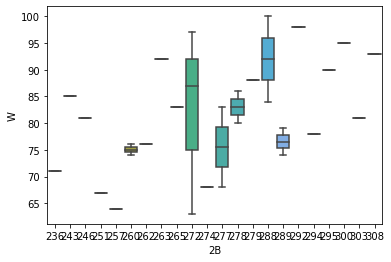

In [38]:
sns.boxplot(df['2B'],df['W'])

In [16]:
# Double runs maximum time lead to wins the match.

## Bar Plot

### AB

<AxesSubplot:xlabel='W', ylabel='AB'>

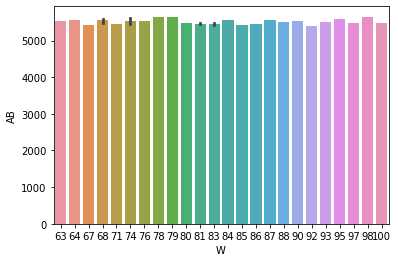

In [24]:
sns.barplot(df['W'],df['AB'])

In [17]:
# At bat doesn't affect much in wining the game.

## Distribution plot

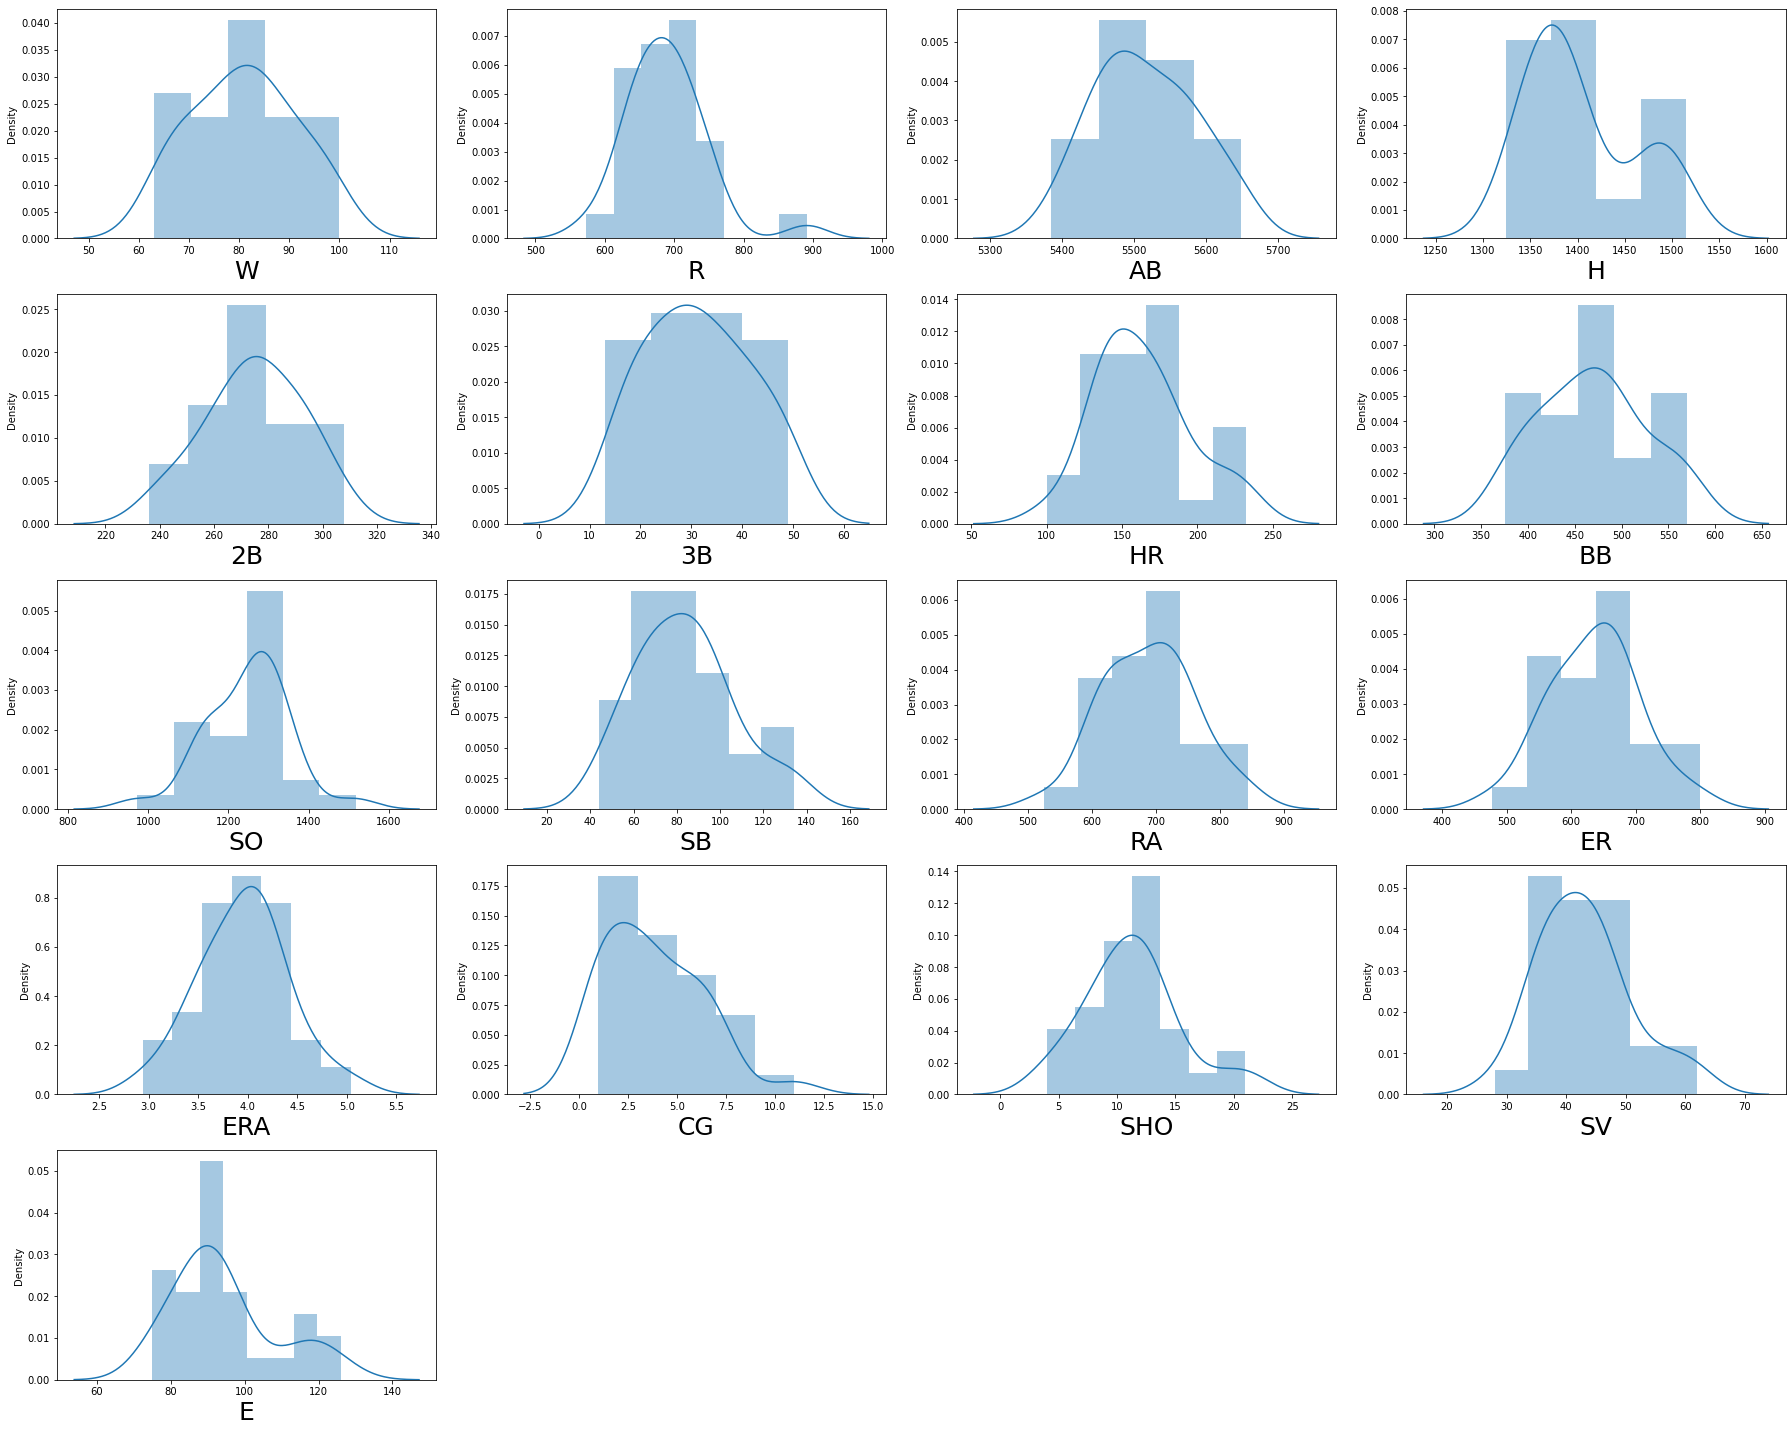

In [54]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

In [18]:
# Distribition Plot gives me clear idea that there is no skewness in the dataset.

## Box Plot

W         AxesSubplot(0.125,0.749828;0.168478x0.130172)
R      AxesSubplot(0.327174,0.749828;0.168478x0.130172)
AB     AxesSubplot(0.529348,0.749828;0.168478x0.130172)
H      AxesSubplot(0.731522,0.749828;0.168478x0.130172)
2B        AxesSubplot(0.125,0.593621;0.168478x0.130172)
3B     AxesSubplot(0.327174,0.593621;0.168478x0.130172)
HR     AxesSubplot(0.529348,0.593621;0.168478x0.130172)
BB     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
SO        AxesSubplot(0.125,0.437414;0.168478x0.130172)
SB     AxesSubplot(0.327174,0.437414;0.168478x0.130172)
RA     AxesSubplot(0.529348,0.437414;0.168478x0.130172)
ER     AxesSubplot(0.731522,0.437414;0.168478x0.130172)
ERA       AxesSubplot(0.125,0.281207;0.168478x0.130172)
CG     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
SHO    AxesSubplot(0.529348,0.281207;0.168478x0.130172)
SV     AxesSubplot(0.731522,0.281207;0.168478x0.130172)
E            AxesSubplot(0.125,0.125;0.168478x0.130172)
dtype: object

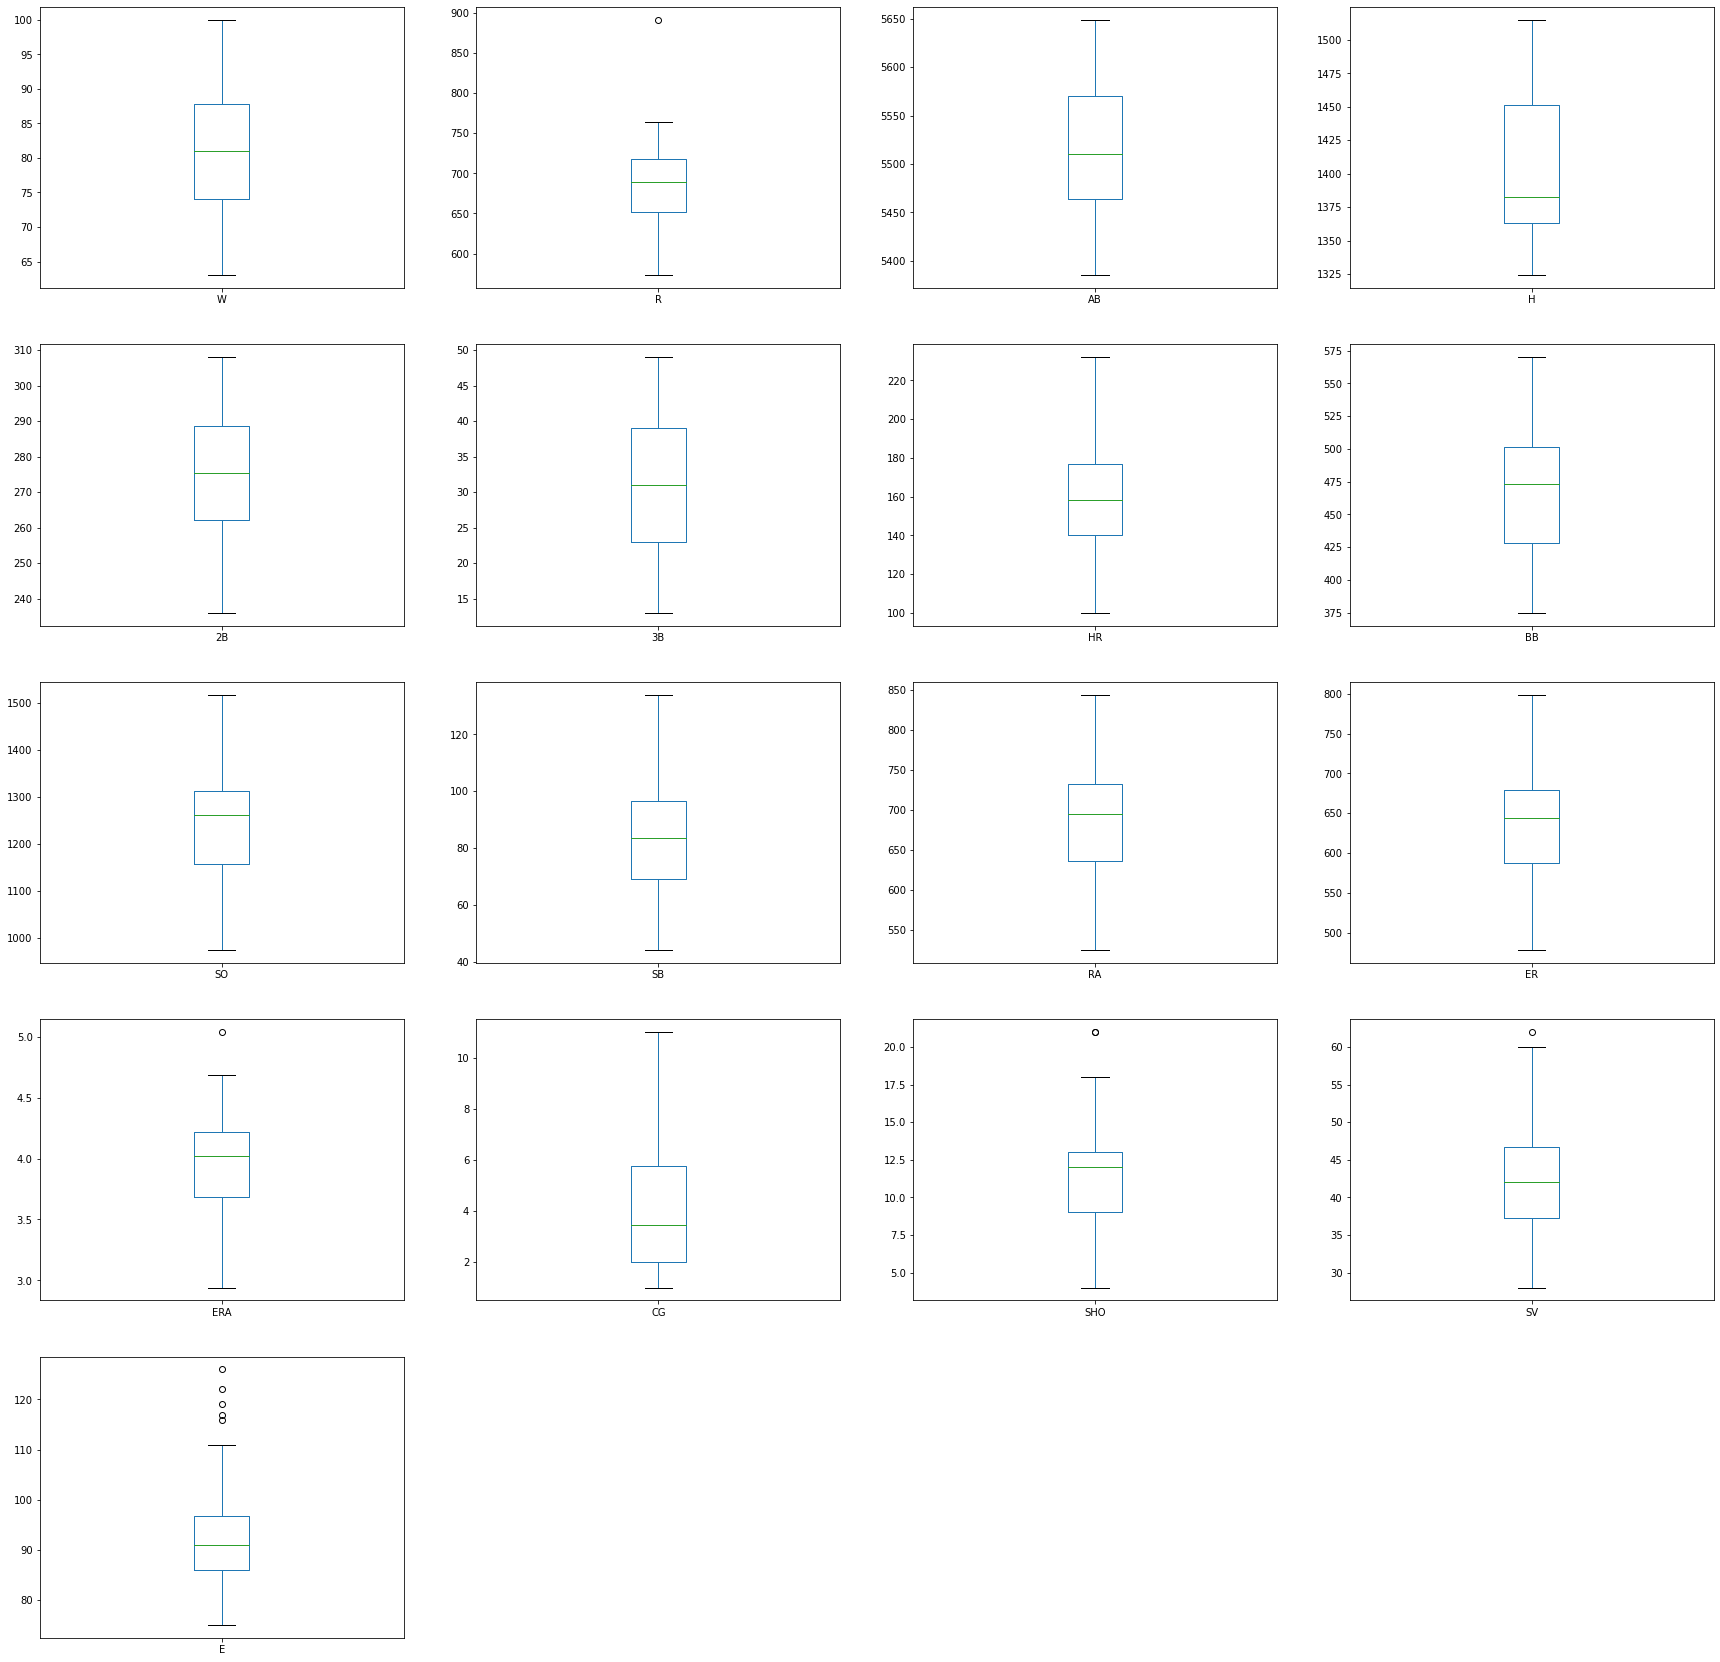

In [56]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))

In [19]:
# With the help of box plot i can say that there are hardly any outliers in the dataset.

## Machine Learning

In [58]:
x = df.drop('W',axis=1)
y = df.W

In [20]:
# I have divided dataset into feature and label.

## StandardScaler

In [59]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.61907797,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.73660011, -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166, -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.73660011,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  2.91931954, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.29446636, -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  1.28073815,  1

In [21]:
# Standard scaler is basically scaling the date in one range so that it will be easy for Model building.

## VIF - variance inflation factor

In [60]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,11.328307,R
1,13.179404,AB
2,11.663062,H
3,3.285044,2B
4,3.269002,3B
5,10.033906,HR
6,3.373978,BB
7,2.652991,SO
8,2.153005,SB
9,187.507984,RA


In [ ]:
# VIF is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# Multicollinearity is a phenomenon when two or more independent variables are highly intercorrelated.
#From the above stats i can say that ER and ERA of the features are highly intercorrelated it means Multicollinearity does exist

## Heatmap

[]

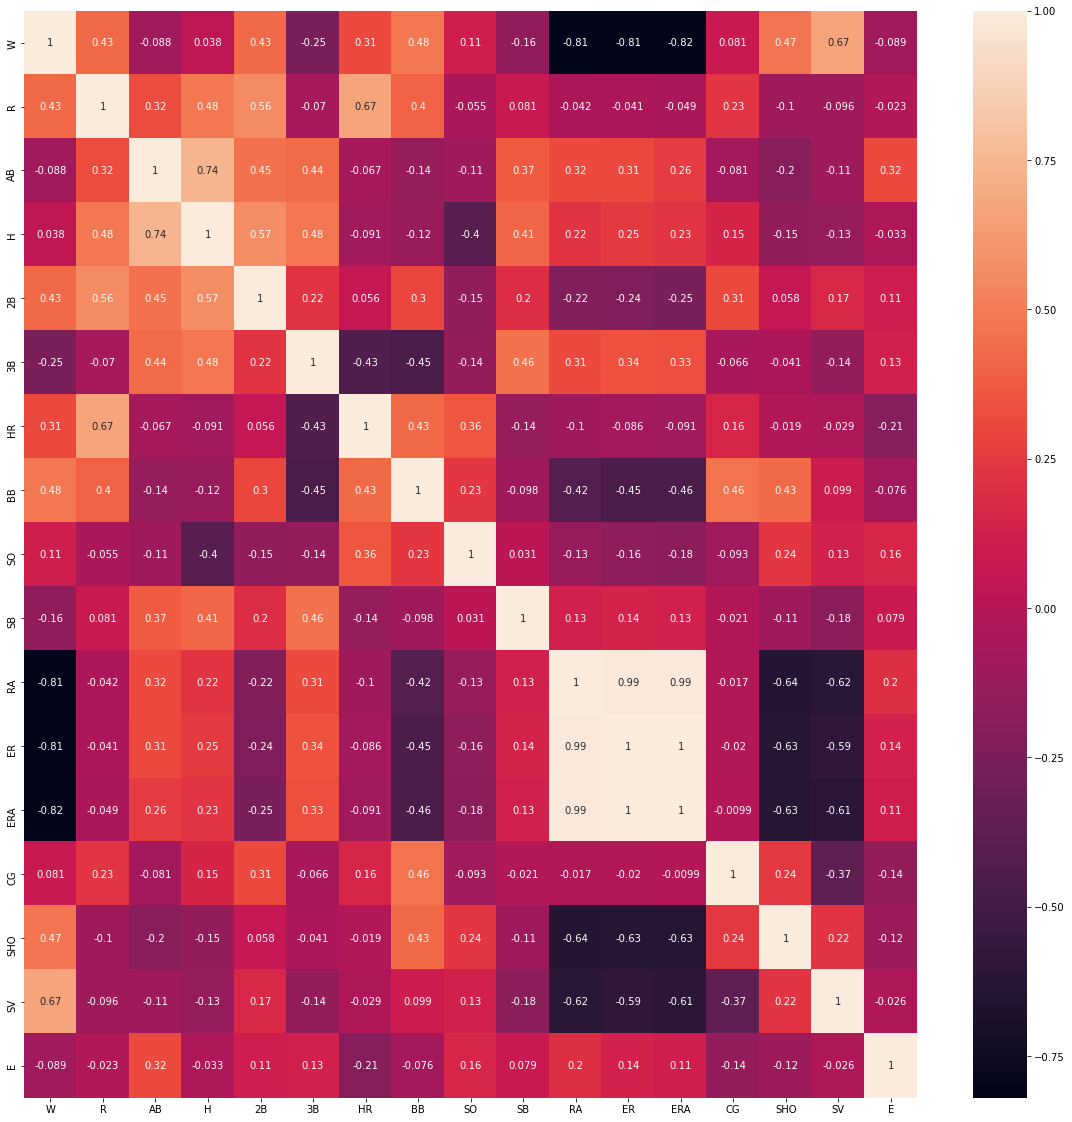

In [24]:
df_cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [25]:
# HR and R is positively correlated with each other.
# RA and ER is positively correlated with each other.
# RA and ERA is positively correlated with each other.
# SHO and RA are negatively correlated to each other.
# SHO and ER are negatively correlated to each other.

## Visualize the correlation

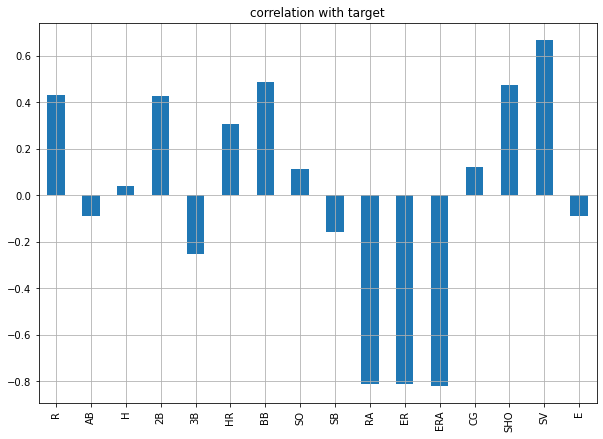

In [63]:
df.drop('W',axis=1).corrwith(df.W).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

In [26]:
# The above plot gives me an clear idea that few columns are positively correlated and few are negatively correlated with label.
# However i will use all the columns for model prediction.

## Model Building

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [27]:
# I have divided dataset into feature and label.

## Linear Regression model

In [124]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [125]:
# adjusted r2 score
rg.score(x_train,y_train)

0.9531593809931667

In [126]:
rg.score(x_test,y_test)

0.8876063589004248

In [127]:
rg.score(x_test,y_test)

0.8876063589004248

In [128]:
y_pred = rg.predict(x_test)
y_pred

array([66.21097391, 84.98468453, 74.42062102, 63.44630053, 77.31055282,
       57.80854299, 85.3677816 , 98.08271723])

### Scatter plot of Linear Regression

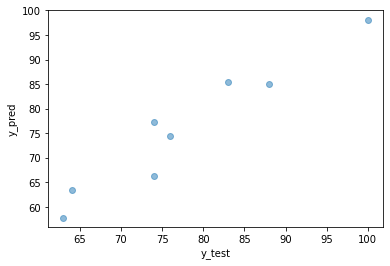

In [129]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [130]:
mean_squared_error(y_test,y_pred)

14.969428073949674

### RMSE

In [131]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.8690345144428053

### R2 Score

In [132]:
r2_score(y_test,y_pred)

0.8876063589004248

In [28]:
# Linear Regression accuracy score 88%

## Random Forest Regressor Model

In [74]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [75]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9235909300573152

In [76]:
rf.score(x_test,y_test)

0.5995859221022993

In [77]:
y_pred = rf.predict(x_test)
y_pred

array([72.45, 76.39, 77.9 , 73.52, 74.31, 69.11, 86.58, 87.96])

### Scatter plot of Random Forest Regressor Model

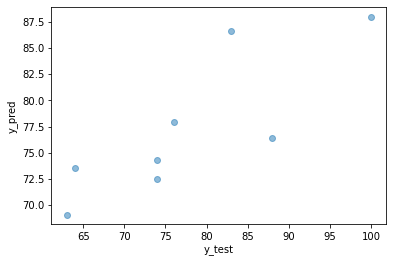

In [78]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [79]:
mean_squared_error(y_test,y_pred)

53.33015000000001

### RMSE

In [80]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.302749482215586

### R2 Score

In [81]:
r2_score(y_test,y_pred)

0.5995859221022993

In [29]:
# Random Forest Regressor accuracy score 60%

## Decision Tree Regressor Model

In [106]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [107]:
# adjusted r2 score
dt.score(x_train,y_train)

1.0

In [108]:
dt.score(x_test,y_test)

0.4997653683716565

In [109]:
y_pred = dt.predict(x_test)
y_pred

array([76., 76., 68., 78., 68., 67., 86., 92.])

## Scatter plot of Decision Tree Regressor Model

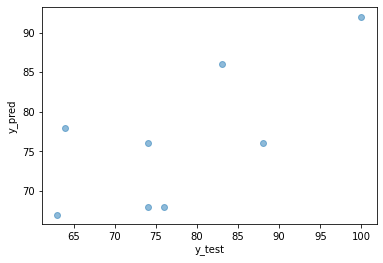

In [110]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [111]:
mean_squared_error(y_test,y_pred)

66.625

### RMSE

In [112]:
np.sqrt(mean_squared_error(y_test,y_pred))

8.162413858657255

### R2 Score

In [113]:
r2_score(y_test,y_pred)

0.4997653683716565

In [30]:
# Decision Tree Regressor accuracy score 50%

## AdaBoost Regressor

In [116]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [117]:
# adjusted r2 score
ada.score(x_train,y_train)

0.9886419943807078

In [118]:
ada.score(x_test,y_test)

0.4663115788314387

In [119]:
y_pred = ada.predict(x_test)
y_pred

array([68.6       , 78.        , 79.875     , 76.        , 71.        ,
       68.        , 85.        , 84.42857143])

## Scatter plot of AdaBoost Regressor

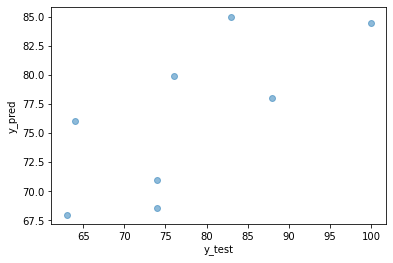

In [120]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [121]:
mean_squared_error(y_test,y_pred)

71.08062659438775

In [122]:
np.sqrt(mean_squared_error(y_test,y_pred))

8.430932723867969

In [123]:
r2_score(y_test,y_pred)

0.4663115788314387

In [31]:
# Ada Boost Regressor accuracy score 47%

## Regularization

In [139]:
# lasso regularization
lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [140]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [141]:
# best alphas parameters
alpha = lasscv.alpha_
alpha

0.16498349269461635

In [142]:
# now we have best parameter lets use the lasso regularization
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.16498349269461635)

In [143]:
lasso_reg.score(x_test,y_test)

0.8982089855920918

In [32]:
# I have tried to improve the accuracy score for Linear Regression with the help of lasso and accuracy score increased by 1%

## Saving the Best Model

In [144]:
import pickle

In [145]:
filename = 'finalized_model.pickle'
pickle.dump(rg,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [34]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/1200/0*OW9_OHyimmrtriUu.jpg")

In [33]:
# The best model is Linear Regressor whose accuracy score is 89%